# 'Wisdom of the crowd' Ensembling models

---

There are several models used in machine learning. We have already seen that on a particular dataset some of them perform better some perform worse.

Different models can make errors which are different from each other. If we aggregate these errors they can potientially became smaller.

#### A small demostration of the principle

Let's assume we have N models, and each model produces an error with 0 mean, and $\sigma^2$ variance. Then the average prediction is the following.

$$ Yp = \frac{1}{N}( \sum_i Y_{true} + \sigma_i )$$ 

The expected value of the individual predictions is the correct prediction, therefore it's the same for the avergae.

The variance of the indivdual predictions was $\sigma^2$. For the average predictions the variance is the following.

$$ \sigma_{ensemble}^2 = \frac{(\sum_i  \sigma_i)^2 }{N^2} $$ 


You might remember from a physics course that the sum of independent random steps in a Brownian motion ( the distance from the origin ) is proportional to $\sqrt N$. (The same argument can be made with the central limit theorem). Therefore the variance of the ensemble predictions shrinks.

$$ \sigma_{ensemble}^2 \sim \frac{1}{N} $$ 


Of course, this was just a simple explanation. The individual errors are never really indepentdent. But the more they are the better the ensemble is.

----

This notebook was created by Dezso Ribli, if you have any remarks or questions, please contact me.

---

In [1]:
%pylab inline  
# This 'magic' imports useful general stuff ignore it now

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sklearn  # machine learning toolbox in python
import pandas as pd  #data handling toolbox

# Load some models. 
from sklearn import linear_model
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble

# cv wrapper
from sklearn.model_selection import cross_val_predict

# wrapwrapper
def testReg(model, x, y):
    """Test a model."""
    y_pred = cross_val_predict(model, x, y, cv=5)  
        
    plot(y,y_pred,'.')  # plot data points
    plot([15,90],[15,90])  # y = x line for reference
    xlabel('age')  # label, labels, labels
    ylabel('predicted age') # and labels

    print 'RMSE:',((y-y_pred)**2).mean()**0.5  # primary metric
    print 'Pearson corr:',np.corrcoef(y,y_pred)[0,1]  # another one

----


## A regression dataset: age and DNA methylation

Interestingly there is no simple way to guess the age of a person. We are not trees, there are no cirles inside us. This can lead to some [interesting situations](https://www.theguardian.com/world/2016/apr/21/canadian-high-school-basketball-star-jonathan-nicola-refugee).

There are various methods using bones (featured in CSI) or teeth, but here we will show another method, a simple and surprisingly accurate blood test.

The dataset consists of some 'epigenetic' markers on their DNA, called 'methylation'. Each variable represents a specific point in the genome, and their value corresponds to the level of 'methylation' of that position. Methylation is a simple chemical modification of the DNA naturally applied by all cells.

![src](http://helicase.pbworks.com/f/DNAmeth.jpg)

The task will be: Predict the age of people based on their 'methylation' values.


[Data source](https://www.ncbi.nlm.nih.gov/pubmed/23177740?dopt=Abstract)

##### Lets load the data and have a look at it:

It has 656 rows (data points/individuals), and 600 columns (variables).

In [3]:
reg_data = pd.read_csv('meta_small.csv.gz')
print reg_data.shape
reg_data.head()

(656, 6000)


,cg15903280,cg06931612,cg06091566,cg13856810,cg03269716,cg00328058,cg02494066,cg19945840,cg07181952,cg12407057,...,cg12760479,cg05246190,cg04485799,cg01321673,cg24228040,cg14457918,cg19214594,cg22416596,cg13092901,age
0,0.684724,0.563155,0.095991,0.680305,0.540084,0.597984,0.688217,0.444277,0.666499,0.618196,...,0.203122,0.167868,0.277622,0.335411,0.089313,0.042557,0.101340,0.598267,0.160862,67
1,0.517232,0.506408,0.100586,0.608048,0.490075,0.546038,0.677310,0.452810,0.604140,0.524437,...,0.210701,0.170298,0.321532,0.385738,0.097602,0.055499,0.106527,0.528350,0.103857,89
2,0.599632,0.583201,0.108200,0.654993,0.499657,0.593465,0.728634,0.448331,0.679618,0.563532,...,0.224165,0.174149,0.298361,0.389150,0.094574,0.052345,0.110643,0.629068,0.162350,66
3,0.558150,0.556847,0.119937,0.677207,0.507026,0.624041,0.710796,0.395542,0.683562,0.656782,...,0.213196,0.180396,0.281102,0.358684,0.103197,0.045500,0.120281,0.651358,0.083764,64
4,0.580601,0.566075,0.073077,0.715584,0.565557,0.625385,0.749879,0.414505,0.646094,0.568832,...,0.193233,0.169397,0.299378,0.393603,0.077079,0.057783,0.128077,0.644327,0.154921,62


Create X,Y matrices.

In [4]:
x = reg_data.drop(['age'],axis=1).values
y = reg_data.age.values

----

### Random 'forest' are ensembles of trees

Random forests are ensembles of decision trees. The individual trees are forced to be different, and forced to make different errors, because they are trained on different parts of the data.


When predicting, you can take the average of the predictions made by the individual trees to obtain the prediction on the whole forest.


Using more and more trees improves the performance of the model. And also improves the runtime too... The performance saturates after some tens, hundreds or thousands of trees.



RMSE: 9.73020191303
Pearson corr: 0.768660022599


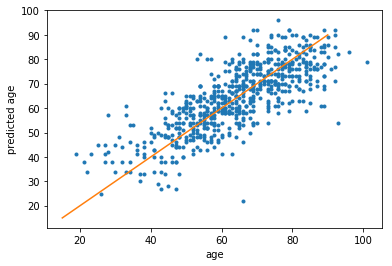

In [5]:
# let's train a forest made out of 1 tree
testReg(ensemble.RandomForestRegressor(n_estimators=1,n_jobs=-1), x, y)

RMSE: 8.32612238827
Pearson corr: 0.83041200647


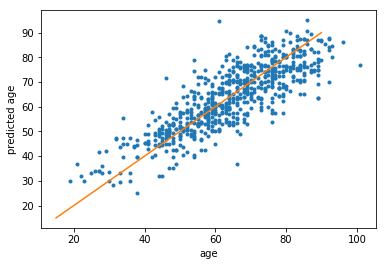

In [6]:
# 2 trees are already a lot better
testReg(ensemble.RandomForestRegressor(n_estimators=2,n_jobs=-1), x, y)

RMSE: 7.35278692808
Pearson corr: 0.866666208571


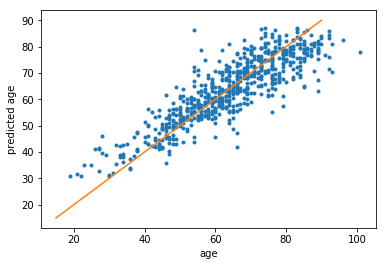

In [7]:
# 5 even better
testReg(ensemble.RandomForestRegressor(n_estimators=5,n_jobs=-1), x, y)

RMSE: 7.08149533782
Pearson corr: 0.877025937262


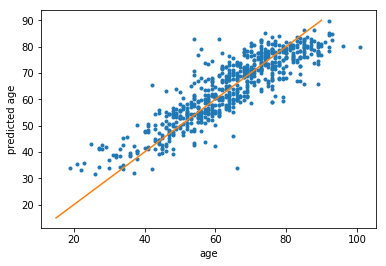

In [8]:
# 10 continues to improve
testReg(ensemble.RandomForestRegressor(n_estimators=10,n_jobs=-1), x, y)

### Do not run the ones below if you don't have time !!!

RMSE: 6.68977673804
Pearson corr: 0.892781466673
CPU times: user 5min 58s, sys: 1.8 s, total: 5min 59s
Wall time: 1min 46s


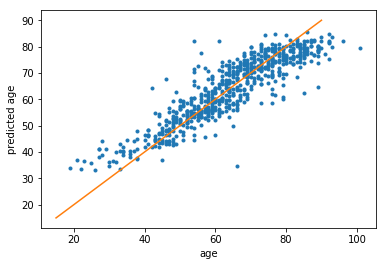

In [9]:
%%time
# 50 already takes 40 seconds !
testReg(ensemble.RandomForestRegressor(n_estimators=50,n_jobs=-1), x, y)

### Performance saturates around 100 trees now!

RMSE: 6.55546550969
Pearson corr: 0.897940856952
CPU times: user 11min 56s, sys: 3.29 s, total: 11min 59s
Wall time: 3min 26s


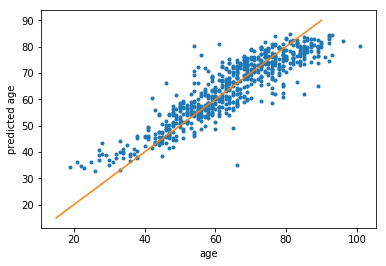

In [10]:
%%time
# 100 trees, 3.5 minutes and not much better
testReg(ensemble.RandomForestRegressor(n_estimators=100,n_jobs=-1), x, y)

---

# Ensembling different models

Random forests benefit from ensembling because the individual trees are forced to be different.

Conceptually different models can be ensembled to obtain further improvements.

### Try to ensemble some different models

In [11]:
# another wrapper
def ev(y,yp):
    """Eval."""
    print 'RMSE:',((y-yp)**2).mean()**0.5  # primary metric
    print 'Pearson corr:',np.corrcoef(y,yp)[0,1]  # another one

A K nearest neighbor regression.

In [12]:
y_knn = cross_val_predict(neighbors.KNeighborsRegressor(), x, y, cv=5)
ev(y,y_knn)

RMSE: 8.60955580849
Pearson corr: 0.829862663754


And a Random Forest

In [13]:
y_rfo = cross_val_predict(ensemble.RandomForestRegressor(
    n_estimators =3, n_jobs=-1), x, y, cv=5)
ev(y,y_rfo)

RMSE: 7.86768113894
Pearson corr: 0.846625444797


### Their simple average ensemble triumphs over individual models!

In [14]:
y_ens = (y_rfo + y_knn)/2
ev(y,y_ens)

RMSE: 7.31573194855
Pearson corr: 0.874754704115


# So let's ensemble All the things?

![src](https://vignette.wikia.nocookie.net/glee/images/3/3b/Pfft-meme-face-i6.jpg/revision/latest?cb=20120320232028)

### No, significantly worse models can drag better ones down.

A really good linear model.

In [15]:
y_lin = cross_val_predict(linear_model.LinearRegression(), x, y, cv=5)
ev(y,y_lin)

RMSE: 4.65605504438
Pearson corr: 0.949431477328


The ensemble is worse than the best individual.

In [16]:
y_ens = (y_rfo + y_lin)/2
ev(y,y_ens)

RMSE: 5.49907660297
Pearson corr: 0.928738289723


### Similar models also do not gain from ensembing




In [17]:
y_rid = cross_val_predict(linear_model.Ridge(), x, y, cv=5)
ev(y,y_rid)

RMSE: 4.62543513509
Pearson corr: 0.950245738278


Linear regression, and Ridge regression only differ in a penalty term. Their ensemble is not any better than the individual models.

In [18]:
y_ens = (y_rid + y_lin)/2
ev(y,y_ens)

RMSE: 4.63316776942
Pearson corr: 0.950002865778


----


# Messages:


* There is no best model, different models are able to capture different aspects of the data.
* Different models will make different errors, ensembling them can eliminate these errors, and improve performance.

* Only models of similar performance can be ensembled.
* Only models which are 'different enough' can be ensembled.


---

# More

* There are more sophisticated ensembles, called 'blending' or 'stacking', when instead of unsupervised averageing, you also learn in a supervised manner, how to ensemble the individual predictions. 
    - See [original article](http://www.machine-learning.martinsewell.com/ensembles/stacking/Wolpert1992.pdf): Wolpert, David H. "Stacked generalization." Neural networks 5.2 (1992): 241-259.
* Machine learning competitions are almost always won with ensembling.
* Ensemble models tend to grow larger and larger, and eventially become too complex to be practically usable. Control yourself ;)


* Computer vision models tend to be very suspectible to random errors, and you can gain significant error reductions by simply retrainig your model with a different order of images, and ensemble the two models.
* Also different neural networks with different 'architectures' usually gain significantly from ensembling too.